In [4]:
import mne
import os
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs
from mne.preprocessing import read_ica
from mne.beamformer import apply_lcmv, make_lcmv
from preprocessing import Preprocessing
from mne import compute_raw_covariance
from datahandling import BcomMEG
from wavelets import *
import matplotlib.pyplot as plt

In [5]:
empty_room = mne.io.read_raw_fif(
    "/Volumes/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/empty_room_cleaned_ICA_raw.fif",
    preload=True
    )
empty_room.info['bads']
bad_loc_channel = "MEG 173"
empty_room.interpolate_bads(exclude=[bad_loc_channel], origin=(0., 0., 0.))

Opening raw data file /Volumes/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/empty_room_cleaned_ICA_raw.fif...
Isotrak not found
    Range : 0 ... 89999 =      0.000 ...   179.998 secs
Ready.
Reading 0 ... 89999  =      0.000 ...   179.998 secs...
Setting channel interpolation method to {'meg': 'MNE'}.
Interpolating bad channels.
    Computing dot products for 244 MEG channels...
    Computing cross products for 244 → 3 MEG channels...
    Preparing the mapping matrix...
    Truncating at 88/244 components to omit less than 0.0001 (9.6e-05)


<Raw | empty_room_cleaned_ICA_raw.fif, 280 x 90000 (180.0 s), ~192.5 MB, data loaded>

Using up to 900 segments
Using data from preloaded Raw for 900 events and 100 original time points ...
0 bad epochs dropped
Reducing data rank from 247 -> 247
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    MAG regularization : 0.1
    MAG regularization : 0.1
    MAG regularization : 0.1
Number of samples used : 90000
log-likelihood on unseen data (descending order):
   shrunk: -1369.447
   diagonal_fixed: -1397.723
   empirical: -1499.945
selecting best estimator: shrunk
[done]
Computing rank from covariance with rank=None
    Using tolerance 9.7e-14 (2.2e-16 eps * 247 dim * 1.8  max singular value)
    Estimated rank (mag): 247
    MAG: rank 247 computed from 247 data channels with 0 projectors


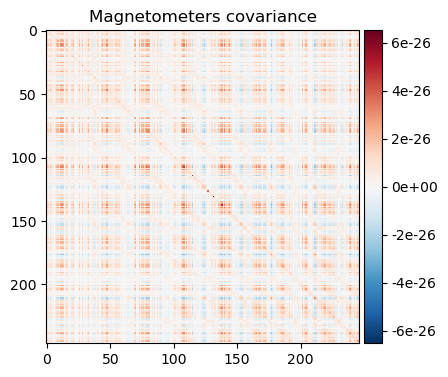

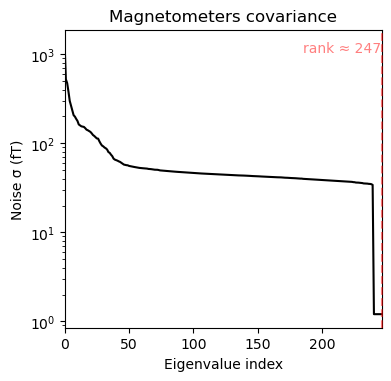

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [22]:
noise_cov = compute_raw_covariance(empty_room, 
                                   method='auto',
                                   rank="info", 
                                   picks="meg")
mne.viz.plot_cov(noise_cov, empty_room.info)

In [9]:
scaled = "scaled_fsaverage"
subject = "BCOM_01_2"

morphed_bem = f"/Users/ciprianbangu/mne_data/MNE-fsaverage-data/{scaled}_{subject}/bem/{scaled}_{subject}-5120-5120-5120-bem-sol.fif"
morphed_source = f"/Users/ciprianbangu/mne_data/MNE-fsaverage-data/{scaled}_{subject}/bem/{scaled}_{subject}-ico-5-src.fif"
morphed_trans = f"/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/trans/{subject}-trans.fif"


fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)

0 files missing from root.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage


In [10]:
# old_dir = "/Volumes/BCOM/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT"
dir_cov = '/Volumes/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT'
dir_ov = '/Volumes/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/OVERT'
subjects = [subject]
picks = None

data_covert = BcomMEG(dir=dir_cov, subjects=subjects, picks=picks, avoid_reading=False, avoid_producing=False)
data_overt = BcomMEG(dir=dir_ov, subjects=subjects, picks=picks, avoid_reading=False, avoid_producing=False)

Reading /Volumes/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_le_24-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Reading /Volumes/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_si_156-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Reading /Volumes/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_ma_32-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
18 matching events found
No baseline correction app

In [11]:
subject

'BCOM_01_2'

In [12]:
data_overt.data

{'BCOM_01_2': {'a_112': <EpochsFIF | 2 events (all good), -0.4 – 0.8 s (baseline off), ~2.8 MB, data loaded,
   '112': 2>,
  'le_24': <EpochsFIF | 1 events (all good), -0.4 – 0.8 s (baseline off), ~1.7 MB, data loaded,
   '24': 1>,
  'ma_32': <EpochsFIF | 3 events (all good), -0.4 – 0.8 s (baseline off), ~3.9 MB, data loaded,
   '32': 3>,
  'ma_132': <EpochsFIF | 3 events (all good), -0.4 – 0.8 s (baseline off), ~3.9 MB, data loaded,
   '132': 3>,
  'te_64': <EpochsFIF | 2 events (all good), -0.4 – 0.8 s (baseline off), ~2.8 MB, data loaded,
   '64': 2>,
  'se_154': <EpochsFIF | 1 events (all good), -0.4 – 0.8 s (baseline off), ~1.7 MB, data loaded,
   '154': 1>,
  're_144': <EpochsFIF | 2 events (all good), -0.4 – 0.8 s (baseline off), ~2.8 MB, data loaded,
   '144': 2>,
  'ri_146': <EpochsFIF | 1 events (all good), -0.4 – 0.8 s (baseline off), ~1.7 MB, data loaded,
   '146': 1>,
  'ri_46': <EpochsFIF | 1 events (all good), -0.4 – 0.8 s (baseline off), ~1.7 MB, data loaded,
   '46': 1

In [13]:
raw = mne.io.read_raw_fif(fname="/Volumes/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/subject_cleaned_ica_raw.fif")

Opening raw data file /Volumes/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/subject_cleaned_ica_raw.fif...
    Range : 0 ... 378957 =      0.000 ...   757.914 secs
Ready.


In [14]:
raw.info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99998695  0.00350168  0.00372768  0.00148638]
 [-0.00451716  0.94650698  0.32265171 -0.03080797]
 [-0.00239845 -0.32266435  0.94651043  0.06309178]
 [ 0.          0.          0.          1.        ]]

In [15]:
data_overt.data[subject]['re_144'].info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99994797  0.01019562  0.00025355  0.00129247]
 [-0.00975402  0.94878435  0.31577376 -0.03088622]
 [ 0.00297895 -0.31575981  0.94883448  0.0641904 ]
 [ 0.          0.          0.          1.        ]]

In [16]:
first_syl = 'a_112'
epoch_array = data_overt.data[subject][first_syl]

for syl in data_covert.data[subject]:
    if syl != first_syl:
        epoch_array = mne.concatenate_epochs([epoch_array, data_covert.data[subject][syl]])

for syl in data_overt.data[subject]:
    if syl != first_syl:
        print(syl)
        try:
            epoch_array = mne.concatenate_epochs([epoch_array, data_overt.data[subject][syl]])
        except Exception as e:
            print(f"An error occurred with syllable {syl}: {e}")
            continue

Not setting metadata
9 matching events found
No baseline correction applied
Not setting metadata
15 matching events found
No baseline correction applied
Not setting metadata
33 matching events found
No baseline correction applied
Not setting metadata
51 matching events found
No baseline correction applied
Not setting metadata
61 matching events found
No baseline correction applied
Not setting metadata
69 matching events found
No baseline correction applied
Not setting metadata
82 matching events found
No baseline correction applied
Not setting metadata
95 matching events found
No baseline correction applied
Not setting metadata
106 matching events found
No baseline correction applied
Not setting metadata
119 matching events found
No baseline correction applied
Not setting metadata
126 matching events found
No baseline correction applied
Not setting metadata
132 matching events found
No baseline correction applied
Not setting metadata
146 matching events found
No baseline correction app

In [17]:
data_overt.data[subject]['ti_66'].info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99998695  0.00350168  0.00372768  0.00148638]
 [-0.00451716  0.94650698  0.32265171 -0.03080797]
 [-0.00239845 -0.32266435  0.94651043  0.06309178]
 [ 0.          0.          0.          1.        ]]

In [23]:
data_cov = mne.compute_covariance(epoch_array.copy().crop(tmin=-0.2, tmax=0.4), method='auto', rank="info")

Reducing data rank from 247 -> 247
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    MAG regularization : 0.1
    MAG regularization : 0.1
    MAG regularization : 0.1
Number of samples used : 130935
log-likelihood on unseen data (descending order):
   shrunk: -1355.143
   diagonal_fixed: -1407.217
   empirical: -1433.069
selecting best estimator: shrunk
[done]


Computing rank from covariance with rank=None
    Using tolerance 1.4e-13 (2.2e-16 eps * 247 dim * 2.5  max singular value)
    Estimated rank (mag): 247
    MAG: rank 247 computed from 247 data channels with 0 projectors


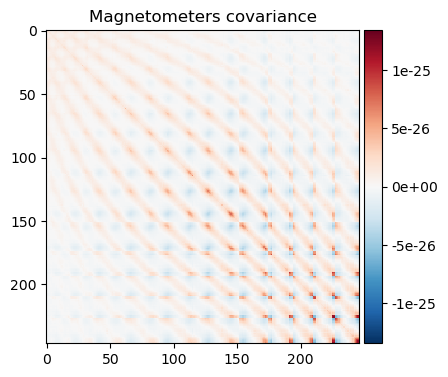

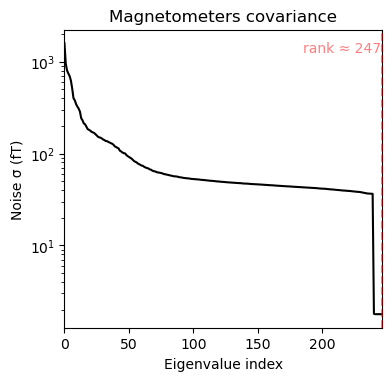

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [24]:
data_cov.plot(epoch_array.info)

In [20]:
forward_model = mne.make_forward_solution(
    epoch_array.info,
    trans=morphed_trans,
    src=morphed_source, 
    bem=morphed_bem, 
    meg=True, 
    eeg=False
)

Source space          : /Users/ciprianbangu/mne_data/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-ico-5-src.fif
MRI -> head transform : /Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/trans/BCOM_01_2-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/ciprianbangu/mne_data/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/ciprianbangu/mne_data/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999667 -0.010944 -0.023385       1.50 mm
    0.010999 0.999937 0.002219      25.63 mm
    0.023359 -0.002476 0.999724      34.46 mm
    0.000000 0.000000 0.000000       1.00

Read 247 MEG channels from info
105 coil 

In [25]:
filters = make_lcmv(
    epoch_array.info,
    forward_model,
    data_cov,
    reg=0.05,
    noise_cov=noise_cov,
    pick_ori="max-power",
    weight_norm="unit-noise-gain",
    rank="info",
)

Computing rank from covariance with rank='info'
    MAG: rank 247 after 0 projectors applied to 247 channels
Computing rank from covariance with rank='info'
    MAG: rank 247 after 0 projectors applied to 247 channels
Making LCMV beamformer with rank {'mag': 247}
Computing inverse operator with 247 channels.
    247 out of 247 channels remain after picking
Selected 247 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 247}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 20484 sources
Filter computation complete


In [26]:
stc = mne.beamformer.apply_lcmv_epochs(epoch_array, filters)

Processing epoch : 1
Processing epoch : 2
Processing epoch : 3
Processing epoch : 4
Processing epoch : 5
Processing epoch : 6
Processing epoch : 7
Processing epoch : 8
Processing epoch : 9
Processing epoch : 10
Processing epoch : 11
Processing epoch : 12
Processing epoch : 13
Processing epoch : 14
Processing epoch : 15
Processing epoch : 16
Processing epoch : 17
Processing epoch : 18
Processing epoch : 19
Processing epoch : 20
Processing epoch : 21
Processing epoch : 22
Processing epoch : 23
Processing epoch : 24
Processing epoch : 25
Processing epoch : 26
Processing epoch : 27
Processing epoch : 28
Processing epoch : 29
Processing epoch : 30
Processing epoch : 31
Processing epoch : 32
Processing epoch : 33
Processing epoch : 34
Processing epoch : 35
Processing epoch : 36
Processing epoch : 37
Processing epoch : 38
Processing epoch : 39
Processing epoch : 40
Processing epoch : 41
Processing epoch : 42
Processing epoch : 43
Processing epoch : 44
Processing epoch : 45
Processing epoch : 

: 